In [139]:
%matplotlib inline
import numpy as np
import csv 
import matplotlib.pyplot as plt 

In [140]:
with open('/kaggle/input/yahoo-stock-price/yahoo_stock_price.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

In [141]:
data = np.array(data)

In [142]:
data = data[1:, :]

In [143]:
data

array([['1999-11-18 00:00:00-05:00', '27.70821424', '30.44858993', ...,
        '62546380', '0', '0'],
       ['1999-11-19 00:00:00-05:00', '26.14773485', '26.18579691', ...,
        '15234146', '0', '0'],
       ['1999-11-22 00:00:00-05:00', '25.15814548', '26.79475784', ...,
        '6577870', '0', '0'],
       ...,
       ['2023-09-19 00:00:00-04:00', '112.3700027', '113.2300034', ...,
        '2222400', '0', '0'],
       ['2023-09-20 00:00:00-04:00', '113.0800018', '113.4700012', ...,
        '1744900', '0', '0'],
       ['2023-09-21 00:00:00-04:00', '112.0299988', '112.1949997', ...,
        '472462', '0', '0']], dtype='<U25')

In [144]:
close_prices = data[:, 4].astype(np.float_)

In [145]:
close_prices

array([ 26.79475784,  24.58724594,  26.79475784, ..., 112.3099976 ,
       112.4700012 , 110.2200012 ])

In [146]:
time = data[:, 0]
time

array(['1999-11-18 00:00:00-05:00', '1999-11-19 00:00:00-05:00',
       '1999-11-22 00:00:00-05:00', ..., '2023-09-19 00:00:00-04:00',
       '2023-09-20 00:00:00-04:00', '2023-09-21 00:00:00-04:00'],
      dtype='<U25')

In [147]:
# slicer = np.frompyfunc(lambda s: s[:4], 1,1)
# years = slicer(time).astype(np.int_)
# years

time = np.char.partition(time, "-")
time

array([['1999', '-', '11-18 00:00:00-05:00'],
       ['1999', '-', '11-19 00:00:00-05:00'],
       ['1999', '-', '11-22 00:00:00-05:00'],
       ...,
       ['2023', '-', '09-19 00:00:00-04:00'],
       ['2023', '-', '09-20 00:00:00-04:00'],
       ['2023', '-', '09-21 00:00:00-04:00']], dtype='<U20')

In [148]:
years = time[:, 0].astype(np.int_)
years

array([1999, 1999, 1999, ..., 2023, 2023, 2023])

In [149]:
# unique_years = np.arange(np.min(years),np.max(years)+1)
# unique_years

unique_years, years_indices = np.unique(years, return_inverse =True)
unique_years, years_indices

(array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
        2021, 2022, 2023]),
 array([ 0,  0,  0, ..., 24, 24, 24]))

In [150]:
# def loop_mean():
#     mean = []
#     for val in unique_years:
#         temp = close_prices[years == val]
#         mean.append(np.mean(temp))
#     return mean

# %timeit loop_mean()

sum_per_year = np.bincount(years_indices, weights=close_prices)
count_per_year = np.bincount(years_indices)

mean_per_year = sum_per_year / count_per_year
mean_per_year



array([ 29.43998095,  42.46252954,  20.35760199,  13.97428396,
        12.32638651,  16.36899289,  16.47918797,  20.78849607,
        23.20026741,  19.48800275,  14.13519995,  21.02101021,
        26.74917087,  25.9296793 ,  30.6731562 ,  37.58608011,
        37.00473931,  40.97606365,  56.63620735,  64.67308148,
        73.07648244,  90.69929209, 142.75829915, 131.94701887,
       131.47846859])

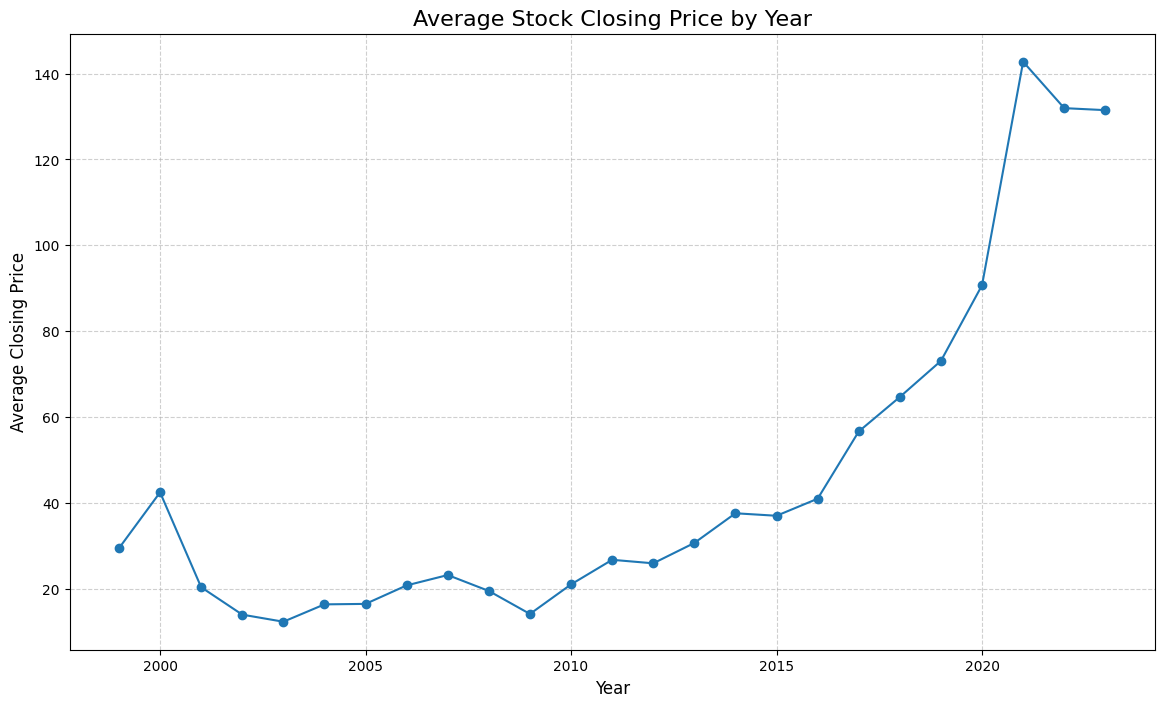

In [151]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(unique_years, mean_per_year, marker='o')
ax.set_title('Average Stock Closing Price by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Closing Price', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)